# TEXT PROCESSING ON RESUME

##  NLP-PIPELINE:
    1.DATA ACQUISITION
    2.DATA ANALYSIS
    3.TEXT PREPROCESSING
    4.TEXT VECTORIZATION
    5.MODELING
    6.SERIALIZATION
    7.PREDICTION
    

    

## 1.DATASET

In [3]:
import pandas as pd                                            #importing pandas

In [4]:
df = pd.read_csv('UpdatedResumeDataSet.csv')                   #reading the dataset


In [5]:
df.shape

(962, 2)

In [6]:
df.isnull().sum()                                              #isnull returns boolean value hence use sum to sum them

Category    0
Resume      0
dtype: int64

In [7]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [8]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

## 2.DATA ANALYSIS 

In [9]:
series = df['Category'].value_counts()                        #extracting categories from the dataset as a series
result = series.reset_index()                                 # reset_index() converts the indexing to a new column in df 
result.columns=['Category','Count']                           #renaming the columns for graph

In [10]:
result.head()

,Category,Count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45


In [11]:
import seaborn as sns                                       #importing seaborn ans matplotlib for ploting data
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


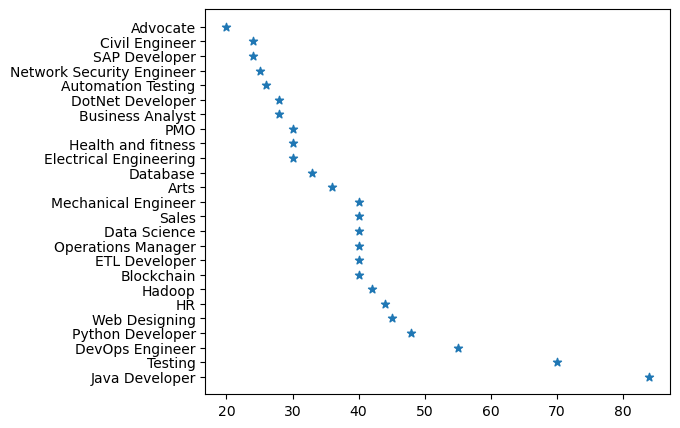

In [12]:
plt.figure(figsize=(6,5))
plt.scatter(result.Count,result.Category,marker='*')
plt.show()

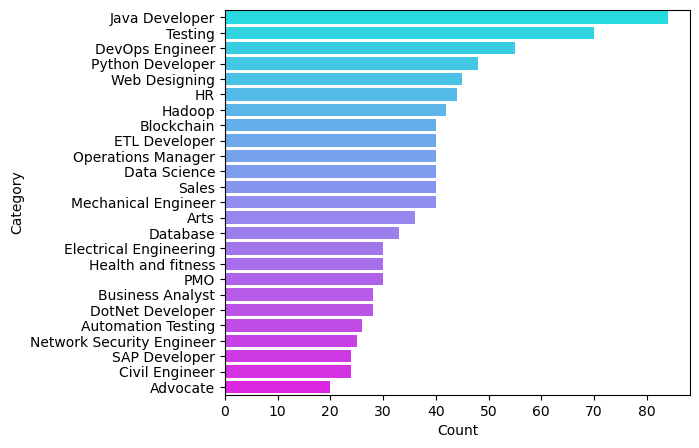

In [13]:
plt.figure(figsize=(6,5))                                              #figsize define the canvas size
sns.barplot(x=result.Count,y=result.Category, palette='cool')           #barplot in seaborn
plt.show()

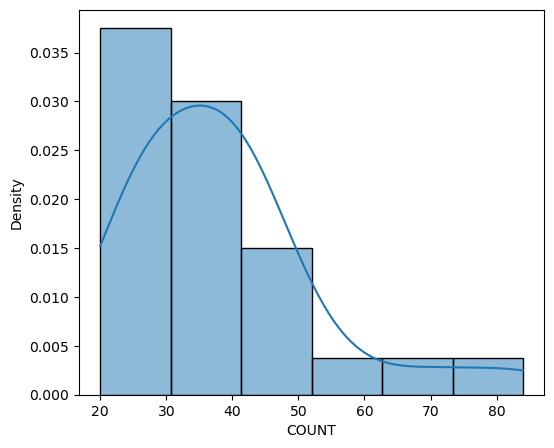

In [14]:
plt.figure(figsize=(6,5))
sns.histplot(result.Count, kde=True,stat='density',bins=6)
plt.xlabel('COUNT')
plt.show()

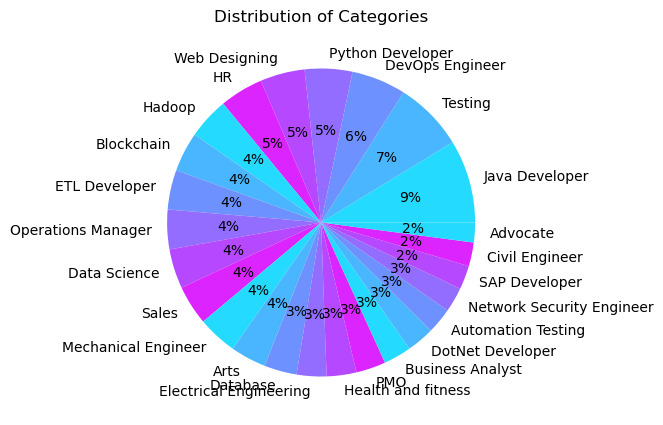

In [15]:
plt.figure(figsize=(6,5))                                              #pieplot in matplotlib
plt.pie(result.Count,labels=result.Category, colors = sns.color_palette('cool'),autopct='%.0f%%') 
plt.title('Distribution of Categories')
plt.show()

## 3.TEXT PREPROCESSING
      1.DATA CLEANING
      2.DATA ENCODING

#### 3.1 LOWERCASING

In [16]:
df.head()                                                      #before

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [17]:
df['Resume'] = df['Resume'].str.lower()                        #string lower methord

In [18]:
df.head()                                                       #after

,Category,Resume
0,Data Science,skills * programming languages: python (pandas...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...
2,Data Science,"areas of interest deep learning, control syste..."
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"education details \r\n mca ymcaust, faridab..."


#### 3.2 REMOVING 
    1.removing URLs
    2.removing RT and cc
    3.removing hashtags
    4.removing mentions
    5.removing extra whitespaces

In [19]:
import re                                               #regex

In [20]:
def cleanResumeUsingStringOperations(resumeText):
    # Remove URLs
    resumeText = ' '.join(word if not word.startswith('http') else ' ' for word in resumeText.split())
    
    # Remove RT and cc
    resumeText = ' '.join(word if word not in ('RT', 'cc') else ' ' for word in resumeText.split())
    
    # Remove hashtags
    resumeText = ' '.join(word if not word.startswith('#') else '' for word in resumeText.split())
    
    # Remove mentions
    resumeText = ' '.join(word if not word.startswith('@') else '  ' for word in resumeText.split())
    
    # Remove non-ASCII characters
    resumeText = ' '.join(' ' if ord(char) > 127 else char for char in resumeText)
    
    # Remove extra whitespace
    resumeText = ' '.join(word for word in resumeText.split())
    
    return resumeTex


In [21]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    
    resumeText = re.sub('RT|cc', ' ', resumeText)       # remove RT and cc
    
    resumeText = re.sub('#\S+', '', resumeText)         # remove hashtags
    
    resumeText = re.sub('@\S+', '  ', resumeText)       # remove mentions
    
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    
    resumeText = re.sub('\s+', ' ', resumeText)         # remove extra whitespace
    
    return resumeText
    

In [22]:
df['Cleaned Resume']=df['Resume'].apply(lambda x:cleanResume(x))

In [23]:
df

,Category,Resume,Cleaned Resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 b e uit...
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,Testing,computer skills: â¢ proficient in ms office (...,computer skills proficient in ms office word b...
958,Testing,â willingness to accept the challenges. â ...,willingness to a ept the challenges positive ...
959,Testing,"personal skills â¢ quick learner, â¢ eagerne...",personal skills quick learner eagerness to lea...
960,Testing,computer skills & software knowledge ms-power ...,computer skills software knowledge ms power po...


#### 3.3 LABEL ENCODING

In [24]:
from sklearn.preprocessing import LabelEncoder            #since it is multi classification we need to give labels to categories

In [25]:
le = LabelEncoder()                                      #calling the methord

In [26]:
df['Category']= le.fit_transform(df['Category'])

In [27]:
df.Category.unique()

# array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'])

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## 4.TEXT VECTORIZATION

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer       #to perform TF-IDF for us 

In [29]:
df

,Category,Resume,Cleaned Resume
0,6,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,6,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 b e uit...
2,6,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,6,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,6,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,23,computer skills: â¢ proficient in ms office (...,computer skills proficient in ms office word b...
958,23,â willingness to accept the challenges. â ...,willingness to a ept the challenges positive ...
959,23,"personal skills â¢ quick learner, â¢ eagerne...",personal skills quick learner eagerness to lea...
960,23,computer skills & software knowledge ms-power ...,computer skills software knowledge ms power po...


In [30]:
my_vectorizer = TfidfVectorizer(stop_words='english')
my_vectorizer.fit(df['Cleaned Resume'])
ResultOfVectorizer = my_vectorizer.transform(df['Cleaned Resume'])

In [31]:
ResultOfVectorizer 

<962x7333 sparse matrix of type '<class 'numpy.float64'>'
	with 164143 stored elements in Compressed Sparse Row format>

## 5.MODELING
    1.Splitting
    2.Modelling

#### 5.1 SPLITTING

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(ResultOfVectorizer,df['Category'],random_state=0, test_size=0.4)

In [34]:
print(x_train.shape)
print(x_test.shape)

(577, 7333)
(385, 7333)


#### 5.2 MODELING

In [35]:
from sklearn.neighbors import KNeighborsClassifier                        #K-NN seems to give the best result
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [36]:
my_classifier = OneVsRestClassifier(KNeighborsClassifier())
my_classifier.fit(x_train,y_train)
ypred = my_classifier.predict(x_test)

In [37]:
print(accuracy_score(y_test,ypred))

0.9818181818181818


In [38]:
from sklearn.metrics import precision_score
print(precision_score(y_test,ypred,average='weighted'))

0.9848697501329079


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)

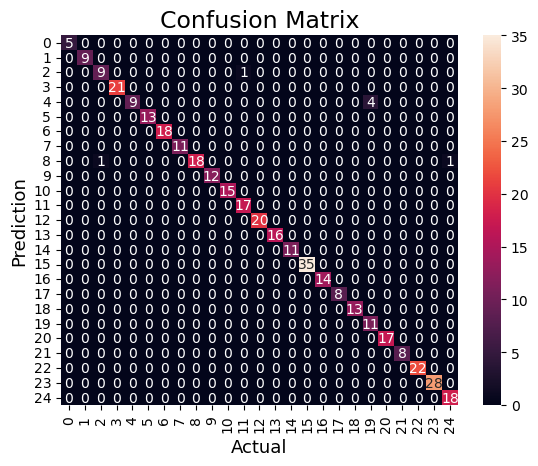

In [40]:
sns.heatmap(cm, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### 6.SERIALIZATION

 dumping my vectoriser and classifier usibg pickle so i can use it in my webpage

In [41]:
import pickle
pickle.dump(my_vectorizer,open('my_vectorizer.pkl','wb'))
pickle.dump(my_classifier, open('my_classifier.pkl', 'wb'))

 ## 7.PREDICTION

In [62]:
input_myresume2 = '''
Irshad Ali
Email Address: irshadali18@gmail.com,irshadali@outlook.com 
Cell: 0321-7588568

Objective
I am looking forward to join a progressive organization. I am Strong team builder and leader. I have high level of personal morals and integrity. I am Goal oriented, self-motivated and committed to the successful outcome of the project. I am willing to work hard and have a great desire to learn.
Summary
    • Since March 2007, have 6 years plus of extensive hands on experience of website development.
    • An experienced team lead and team player with excellent communication and interpersonal skills who has the ability to work independently under pressure.
    • Currently working as Senior Software Engineer/Team Lead at Hashe Computer Solutions.
    • Masters in 2007 from the University College of Information Technology, Lahore, Pakistan.
Skills
Languages/Web Development
PHP, C# .Net, JavaScript, HTML, CSS, Java, XML, SQL
Frameworks
AJAX, Zend, Symfony2,  CodeIgniter
Open Source
Wordpress, Joomla, XCart, CSCart
Databases
MySQL, Oracle
Tools
Netbeans, Dreamweaver, SqlYog, NavicoSoft, MicroOlap


Experience
Hashe Computer Solution, Lahore, Pakistan 
Senior Software Engineer / Team Lead
(March 2008 – To date)
Responsibilities include team management, direct client communication and software development.
Mechtechnologies, Lahore, Pakistan 
Software Engineer
(March 2007 – February 2008)

Projects
Freight Ordering System – Hashe Computer Solutions
Role:
    • Development Lead
Tools:
    • PHP, MySQL, Ajax, JQuery , Web Services
Details:
    • This is a web based system, which provides an online competitive freight quotes within zip code range from best courier & transport companies of the region with favorable discounts and transit days. Later shipment can be booked out of these quotes and tracked though website. Companies can add / manage their locations, product catalog for swift use of the system.
    • This application works with SMC3 to acquire shipment rates for given locations and then apply different accessorial and fuel charges added by admin to calculate final shipment rates.
    • Using the back office application, admin can set different accessorial, discounts, fuel charges, and FAK classes for each company and carrier. Manage the Sales Representatives & this commission for different companies & Carriers.
    • Comprehensive report system provides reports about the shipment, carrier, customer, sale representative commission and billing reports. 
    • Complete Accounting System.

http://www.freightanywhere.com
http://www.tech-logistics.com

Online Golf Course Booking System – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, Ajax, JQuery, Web Services
Details:
    • This is a web based system, which provides golfers an easy way to use website to search, compare, and book golf tee times for free. With numerous golf courses available for play in most areas.

http://www.back9booking.com

Ecommerce Shopping System – Hashe Computer Solutions
Role:
    • Application Developer/Team Lead
Tools:
    • PHP, MySQL, JQuery, Zend
Details:
Complete ecommerce shopping system with following features
    • Administration system to easily update all product details, prices, pictures, stock details and other information online.
    • Manage Customer Accounts
    • Manage Wish list
    • Customer Reviews & Rating
    • Manage categories and products
    • Manage Product options and related products
    • Advanced pricing algorithms
    • Order and Invoice history
    • Take payments online using PayPal
    • Shopping cart system to allow easy purchase of products
    • Automatic email notification of orders
    • Full checkout procedure
    • Fast and friendly quick search and advanced search features
    • Reports of site visits, pages viewed, most viewed products, most ordered products and most viewed categories
http://www.tcig.co.uk

Free Home Listing – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, JQuery, Codeigniter
Details:
This is a property portal with three access level
    • Customer Login
        ◦ Search Properties by State And City, Key words and Zip Code with option in different miles radius i.e. search all properties having zip code 03055 and within 10 miles radius around it.  
        ◦ Register as Customer
        ◦ Manage their Listings
        ◦ Add/Edit property
        ◦ Add/Edit/Delete Properties Images
        ◦ Delete Properties
    • Agent Login
        ◦ Add/Edit property
        ◦ Add/Edit/Delete Properties Images
        ◦ Delete Properties
    • Admin login
        ◦ Manage Customers (Add/Edit/Delete/Active/Inactive)
        ◦ Manage Customer Packages
        ◦ Manage Agents (Add/Edit/Delete/Active/Inactive)
        ◦ Manage Listings (Add/Edit/Delete/Active/Inactive)
http://demo.hashe.com/freehomelistings/

Rockingham Acres – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, JQuery
Details:
This is an Online Flower Store has
    • Online Shopping Cart
    • Word Press Blog
http://www.rockinghamacres.com/


Third Coast Collection – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, JQuery
Details:
This website has
    • Online Shopping Cart
    • Authorized .Net Payment Integration
    • Word Press Blog
http://www.thirdcoastcollection.com/

PPA-Office Management System – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, JQuery
Details:
PPA (Pakistan Progressive Associate) is  licensed  by  Ministry   of  Labor,  Manpower  and  Overseas   Employment ,   Government of  Pakistan for recruitment  of  manpower.  So PPA-Office Management System is developed to manage & integrate all PPA internal processes (i.e. client, contracts, jobs, job seeker registration, resume bank, recruitment process, and visa & departure process). We split this big system into following modules.
    • Office Workflow Management System Administration: This application will allow the administration to
        ◦ Manage Companies, Contracts
        ◦ Application Configurations
        ◦ Manage invoices
        ◦ Manage administrative expenses
            ▪ Advertisement costs
            ▪ Courier charges
            ▪ Misc. charges to be posted
    • Office Workflow Management System: This application will automate the recruitment process of PPA administration and will implement all the business processes hence allowing straight through processing of jobs. This application will have three separate work flows
        ◦ Pre Processing – Jobs management, Resume management and data entry, short listing, interview scheduling and execution, selection of candidates and forwarding for post-processing. 
        ◦ Post Processing
        ◦ Archiving
    • Online Client / Candidate Portal: This portal will allow
        ◦ PPA administration to manage advertisement jobs
        ◦ PPA affiliated companies to:
            ▪ Login into the system
            ▪ Add jobs
            ▪ View list of candidates forwarded by PPA administration, short list them, add notes
            ▪ Browse/Search (if allowed) resume database, create resume lists, add notes on resumes
        ◦ Potential candidates to:
            ▪ Register
            ▪ Add resumes
            ▪ Search for jobs
    • System will allow the printing of all documents required during the execution of a case. System will allow three types of print
        ◦ Printing with PPA logo
        ◦ Printing without PPA logo – to be printed on PPA letter head
        ◦ Custom printing

NetSignNews.com – Hashe Computer Solutions
Role:
    • Development Lead
Tools:
    • PHP, MySQL
Details:
    • Net Sign News is a specialized news channel for with hearing disabilities. NetSignNews.com is an online news portal for NetSignNews. News videos are streamed on demand using FLV format files. This application has a power administration utility using which administrator can manage the contents being published on the website.

VegaPrint.co.uk – VegaSoft Technologies
Role:
    • Development Lead (Freelance)
Tools:
    • PHP, MySQL
Details:
    • This is print media service provider’s website. Here user can order print media products by paying online payment through PayPal, users can also track there orders online. 
    • Using the back office application, admin can add different products, services, special offers, shipment charges, manage users and orders. 

Bug Tracking – Mechtechnologies
Role:
    • Development Team Member
Tools:
    • PHP, MySQL
Details:
This is a web based application which allows software developers to track new bugs, prioritize and assign bugs to team members, generate bug reports, send email messages between users, attach files, customize the account according to their special needs and more.

Academic Projects
Student Information System - MIT Final Project
    • Student Information System superior University Lahore is a web based application developed in PHP and MySQL as database.


Education
Punjab University College of Information Technology, Lahore, Pakistan 
MSC Information Technology 
Year: 2007

Certifications
Microsoft Technologies (Exam: 70-480)
Microsoft Certified Professional 
Year: 2013
Microsoft Technologies (C# .Net)
EVS Lahore 
Year: 2013

Interests
Computer Gaming
References
References can be provided on request.
'''


input_myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [63]:
import pickle

# Load the trained classifier
My_classifier= pickle.load(open('my_classifier.pkl', 'rb'))
My_vectorizer= pickle.load(open('my_vectorizer.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(input_myresume)
cleaned_resume2 = cleanResume(input_myresume2)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = my_vectorizer.transform([cleaned_resume,cleaned_resume2])

# Make the prediction using the loaded classifier
prediction_id = my_classifier.predict(input_features)

# Map category ID to category name
category_mapping = {
    15: "Java Developer",23: "Testing",8: "DevOps Engineer",20: "Python Developer",
    24: "Web Designing",12: "HR",13: "Hadoop",3: "Blockchain",10: "ETL Developer",
    18: "Operations Manager",6: "Data Science",22: "Sales",16: "Mechanical Engineer",
    1: "Arts",7: "Database",11: "Electrical Engineering",14: "Health and fitness",
    9: "PMO",4: "Business Analyst",19: "DotNet Developer",2: "Automation Testing",
    17: "Network Security Engineer",21: "SAP Developer",5: "Civil Engineer",
    0: "Advocate",
}

for i in prediction_id:
    category_name = category_mapping.get(i, "Unknown")
    print("Predicted Category:", category_name)
    print(i)

Predicted Category: Data Science
6
Predicted Category: Web Designing
24
